In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bank-full.csv",sep=';')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
label = le.fit_transform(data['y'])
label

array([0, 0, 0, ..., 1, 0, 0])

In [6]:
le.classes_

array(['no', 'yes'], dtype=object)

In [7]:
new_data = data

In [8]:
new_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data = new_data.drop("y",axis='columns')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [10]:
data['y'] = label

In [11]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0


In [12]:
data.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [13]:
data = data.drop(['job','marital','education','default','housing','loan','contact','day','month','month','previous','poutcome','pdays'],axis=1)

In [14]:
data.shape

(45211, 5)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

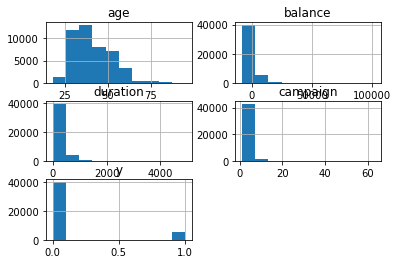

In [15]:
data.hist()

# Transformation

In [16]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [17]:
data.values

array([[  58, 2143,  261,    1,    0],
       [  44,   29,  151,    1,    0],
       [  33,    2,   76,    1,    0],
       ...,
       [  72, 5715, 1127,    5,    1],
       [  57,  668,  508,    4,    0],
       [  37, 2971,  361,    2,    0]], dtype=int64)

In [18]:
array = data.values
scaler = MinMaxScaler(feature_range = (0,1))
rescaledx = scaler.fit_transform (array)
# transformed data
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[0.52 0.09 0.05 0.   0.  ]
 [0.34 0.07 0.03 0.   0.  ]
 [0.19 0.07 0.02 0.   0.  ]
 [0.38 0.09 0.02 0.   0.  ]
 [0.19 0.07 0.04 0.   0.  ]]


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   campaign  45211 non-null  int64
 4   y         45211 non-null  int32
dtypes: int32(1), int64(4)
memory usage: 1.6 MB


In [20]:
X = data.iloc[:,0:3]
Y = data.iloc[:,4]

In [21]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

# Predict for X dataset

In [22]:
y_pred = classifier.predict(X)

In [23]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [24]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Confusion Matrix for the model accuracy

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39344   578]
 [ 4439   850]]


In [26]:
((39344+850)/(39344+578+4439+850))*100

88.90314304041051

In [27]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



# ROC

Text(0, 0.5, 'True Positive Rate')

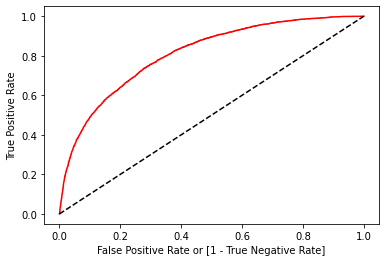

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [29]:
auc

0.5731163384405982